In [44]:
# add the needed imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 

In [46]:
# read the dataset
df = pd.read_csv("Trojan_Detection_dataset.csv")

# remove leading and trailing whitespaces from column names
df = df.rename(columns=lambda x: x.strip())

# list of protocol name where every index represents the protocol number
# protocol_names = ["HOPOPT", "ICMP", "IGMP", "GGP", "IPv4", "ST", "TCP", "CBT", "EGP", "IGP", "BBN-RCC-MON", "NVP-II", "PUP", "ARGUS (deprecated)", "EMCON", "XNET", "CHAOS", "UDP"]

# column_descriptions = {
#     "record_id": "represents the id of the record",
#     "Flow ID": "written as <source/destination ip> - <source/destination ip> - <destination/source port> - <destination/source port> - <protocol>.",
#     "Source IP": "IP address of source",
#     "Source Port": "Port number of source",
#     "Destination IP": "IP address of destination",
#     "Destination Port": "Port number of destination",
#     "Protocol": "name protocol used, refer to @protocol_names list",
#     "Timestamp": "digital record of the date and time when the frame transmitted",
#     "Flow Duration": "the time elapsed between receiving the first and last packets in the flow",
#     "Total Fwd Packets": ""
# }


# remove Timestamp, Flow ID, Class and record_id columns
labels = df['Class']
df = df.drop(columns=['Timestamp', 'Flow ID', 'Class', 'record_id'])


In [47]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
df.describe()
# df["Flow Duration"].describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,177482.000000,177482.000000,177482.000000,1.774820e+05,177482.000000,177482.000000,177482.000000,1.774820e+05,177482.000000,177482.000000,...,177482.000000,177482.000000,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05
mean,38633.298729,5763.328969,8.295917,1.163310e+07,6.743929,9.908261,811.919496,1.023884e+04,230.168969,13.323571,...,1.673894,27.802025,1.421356e+05,2.047529e+04,1.617342e+05,1.264388e+05,4.540725e+06,4.024527e+05,4.894188e+06,4.234695e+06
std,18435.832044,15155.981517,4.540501,2.302798e+07,29.655515,106.401351,6055.745405,1.517666e+05,392.025958,67.749335,...,6.848561,6.652046,7.798898e+05,2.469821e+05,8.791481e+05,7.506803e+05,1.542957e+07,3.246955e+06,1.627581e+07,1.504980e+07
min,0.000000,0.000000,0.000000,2.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,34156.000000,80.000000,6.000000,4.690050e+04,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,43105.500000,443.000000,6.000000,4.854025e+05,2.000000,1.000000,31.000000,3.100000e+01,31.000000,0.000000,...,0.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,52135.000000,443.000000,6.000000,1.062035e+07,5.000000,4.000000,451.000000,4.950000e+02,355.000000,21.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65530.000000,65267.000000,17.000000,1.199991e+08,4502.000000,12951.000000,846614.000000,1.868497e+07,1460.000000,1460.000000,...,586.000000,60.000000,3.059421e+07,1.993857e+07,4.902243e+07,3.059421e+07,1.197736e+08,7.445182e+07,1.197736e+08,1.197736e+08


In [48]:
# prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177482 entries, 0 to 177481
Data columns (total 82 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Source IP                    177482 non-null  object 
 1   Source Port                  177482 non-null  int64  
 2   Destination IP               177482 non-null  object 
 3   Destination Port             177482 non-null  int64  
 4   Protocol                     177482 non-null  int64  
 5   Flow Duration                177482 non-null  int64  
 6   Total Fwd Packets            177482 non-null  int64  
 7   Total Backward Packets       177482 non-null  int64  
 8   Total Length of Fwd Packets  177482 non-null  int64  
 9   Total Length of Bwd Packets  177482 non-null  int64  
 10  Fwd Packet Length Max        177482 non-null  int64  
 11  Fwd Packet Length Min        177482 non-null  int64  
 12  Fwd Packet Length Mean       177482 non-null  float64
 13 

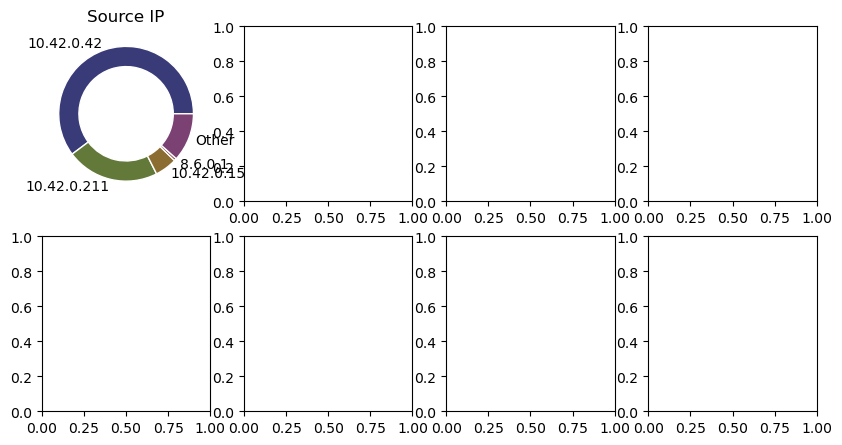

In [98]:
# visualize features in pie chart manner


largest_4 = df['Source IP'].value_counts().nlargest(4)
# print(largest_4)
largest_4.loc['Other'] = len(df['Source IP'])-sum(largest_4.values)  
# print(largest_4)

# print(len(df['Source IP'])-sum(largest_4.values))

# print(type(largest_4))
# print(df['Source IP'].value_counts().nlargest(4))
# print(len(df['Source IP']))

# print(sum(df['Source IP'].value_counts()[:5].nlargest(5).values)/len(df['Source IP']))
# print(len(df['Source IP'].value_counts().index))


cmap = plt.colormaps["tab20b"]
outer_colors = cmap(np.arange(5)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10, 14, 15, 18, 19])

fig, ax = plt.subplots(2, 4, figsize=(10,5))
ax[0][0].set_title(f"Source IP")
ax[0][0].pie(largest_4.values, labels=largest_4.index, radius=1, colors=outer_colors,
       wedgeprops=dict(width=0.3, edgecolor='w'))

# ax[0][0].pie(vals.flatten(), radius=0.7, colors=inner_colors,
#        wedgeprops=dict(width=0.3, edgecolor='w'))

plt.show()

In [ ]:
# use zeroR, SVM, logistic regression, K-NN (lazy classifier)
